In [16]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from poisson_boosting import GradientBoostingPoissonRegressor

In [17]:
X = np.random.uniform(-4*np.pi, 4*np.pi, size=20000).reshape(-1, 1)

f = lambda t: 2*(1 - np.abs(t)/(4*np.pi))*np.abs(np.cos(t))

lam = np.exp(f(X)).flatten()
y = np.random.poisson(lam=lam)

In [18]:
m = GradientBoostingPoissonRegressor(learning_rate=0.01, n_estimators=2000)

In [19]:
m.fit(X, y)

/Users/matthewdrury/Projects/poisson-booster/poisson_boosting.py:66: RuntimeWarning: divide by zero encountered in log
  estimates[idx] = np.log(y_in_node / exp_y_hat_in_node)
/Users/matthewdrury/Projects/poisson-booster/poisson_boosting.py:66: RuntimeWarning: divide by zero encountered in log
  estimates[idx] = np.log(y_in_node / exp_y_hat_in_node)
/Users/matthewdrury/Projects/poisson-booster/poisson_boosting.py:66: RuntimeWarning: divide by zero encountered in log
  estimates[idx] = np.log(y_in_node / exp_y_hat_in_node)
/Users/matthewdrury/Projects/poisson-booster/poisson_boosting.py:66: RuntimeWarning: divide by zero encountered in log
  estimates[idx] = np.log(y_in_node / exp_y_hat_in_node)
/Users/matthewdrury/Projects/poisson-booster/poisson_boosting.py:66: RuntimeWarning: divide by zero encountered in log
  estimates[idx] = np.log(y_in_node / exp_y_hat_in_node)
/Users/matthewdrury/Projects/poisson-booster/poisson_boosting.py:66: RuntimeWarning: divide by zero encountered in log
 

Text(0.5,1,'Poisson Boosting')

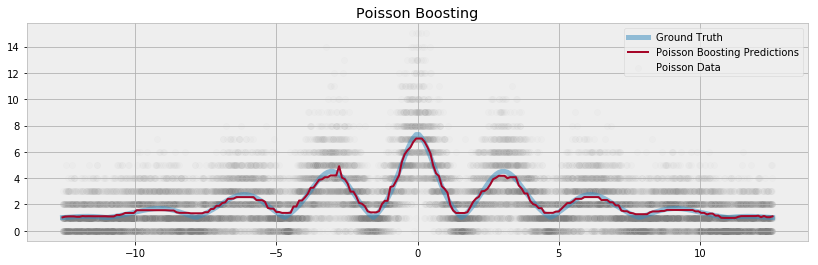

In [21]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter(X.flatten(), y, color="grey", alpha=0.025, label="Poisson Data")

t = np.linspace(-4*np.pi, 4*np.pi, num=250)
ax.plot(t, np.exp(f(t)), label="Ground Truth", linewidth=5, alpha=0.5)

lam_hat = m.predict(t.reshape(-1, 1))
ax.plot(t, lam_hat, label="Poisson Boosting Predictions")

ax.legend()
ax.set_title("Poisson Boosting")